## Machine Learning
# Tarea 2 : Algoritmos de aprendizaje supervisado de clasificación, Decision Tree & Random Forest
---
__PROFESOR : Rodrigo Hernández__

__ALUMNOS : Roy Barrera - José Pérez__

---

# CLASIFICADORES

Escoger un problema abordable mediante el diseño, implementación y validación de algoritmos de aprendizaje supervisado de clasificación, usando Decision Tree & Random Forest 

### Contexto

Al igual que la tarea 1, para el desarrollo del presente trabajo utilizamos los resultados de la __Encuesta de Presupuestos Familiares (EPF)__ de Junio de 2018, disponibilizada por el Instituto Nacional de Estadísticas (INE).

El set de datos a emplear fue previamente preparado en el Jupiter Notebook 01 de Exploración


### Pregunta de Valor

¿ Se puede determinar el nivel de ingresos de una familia, categorizado (Alto, Medio, Bajo), considerando su composición (cantidad de personas que la forma) y su comportamiento de gasto en Alimentacion ?.  


---
### Preparación del Entorno (Librerias)

In [1]:
#gestion de rutas y directorios
import os 
#para manipulacion de data frame
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#para graficos
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline 
from sklearn import tree
#disposicion de argumentos de entrada para ML
import numpy as np
#estadisticos de base
from scipy import stats
#particiones para muestras
from sklearn.model_selection import train_test_split
#modelos de clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
#metricas de desempeño
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import metrics


---
### Carga y desripcion de los Datos

In [26]:
df_t01 = pd.read_csv('Gasto_x_Familia.csv', sep=';', decimal='.')

In [27]:
df_t01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 10 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Ingresos             4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 386.1+ KB


---
### Descripción de los datos

In [50]:
#df_t02=df_t01.drop(['Gastos','Ingresos','G8_Comunicaciones','G9_Recreacion','G10_Educacion'], axis=1)
#df_t02=df_t01.copy()
df_t02=df_t01.drop(['Ingresos'], axis=1)
df_t02

,Personas,Gastos,Categoria,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes
0,5,1387893,1.Bajo,281100.250000,42993.125000,75693.396226,64276.382051,39946.666667,38146.916244
1,4,1880938,2.Medio,255973.527878,137113.429554,110929.322637,203061.496236,47080.444909,148733.787228
2,5,1399475,1.Bajo,202343.931967,307.170378,145270.167519,50029.641672,98708.333333,24680.730814
3,2,340514,1.Bajo,113543.777348,663.321978,40113.968095,1037.017201,91666.666667,11831.470055
4,1,1129143,1.Bajo,15000.000000,14100.000000,75000.000000,150000.000000,278500.000000,46260.869565
...,...,...,...,...,...,...,...,...,...
4936,3,714181,2.Medio,102140.634752,114.873039,43000.000000,179.588980,314282.500000,351.806735
4937,1,2500367,3.Alto,290921.496978,426.612644,121544.056491,66212.552459,1650.905796,15033.860229
4938,4,1745171,2.Medio,551750.651978,111655.471204,101488.723600,9418.545479,109768.309199,69919.646437
4939,3,2280571,2.Medio,427930.341392,9170.961420,159580.360060,28475.215724,70333.333333,33615.410051


In [51]:
df_t02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 9 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 347.5+ KB


In [52]:
df_t02.describe()

,Personas,Gastos,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes
count,4941.000000,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03
mean,3.970451,1.614312e+06,2.749368e+05,30510.643128,80189.430258,1.144853e+05,1.506017e+05,1.087676e+05
std,1.548781,1.308729e+06,1.785312e+05,42820.808602,60006.240471,1.764910e+05,2.194059e+05,1.499305e+05
min,1.000000,6.237700e+04,1.937500e+03,3.216987,3.684826,3.352893e+01,6.429251e+00,3.747312e+01
25%,3.000000,7.897710e+05,1.532214e+05,5000.000000,40113.968095,2.528150e+04,4.291667e+03,2.179672e+04
50%,4.000000,1.224790e+06,2.376860e+05,15684.408430,67458.153461,6.060895e+04,6.793332e+04,6.066429e+04
75%,5.000000,1.982535e+06,3.550237e+05,39679.998779,105031.643441,1.323217e+05,2.037500e+05,1.339603e+05
max,17.000000,1.897800e+07,2.407691e+06,517805.942127,770836.560757,2.391135e+06,2.397525e+06,2.536041e+06


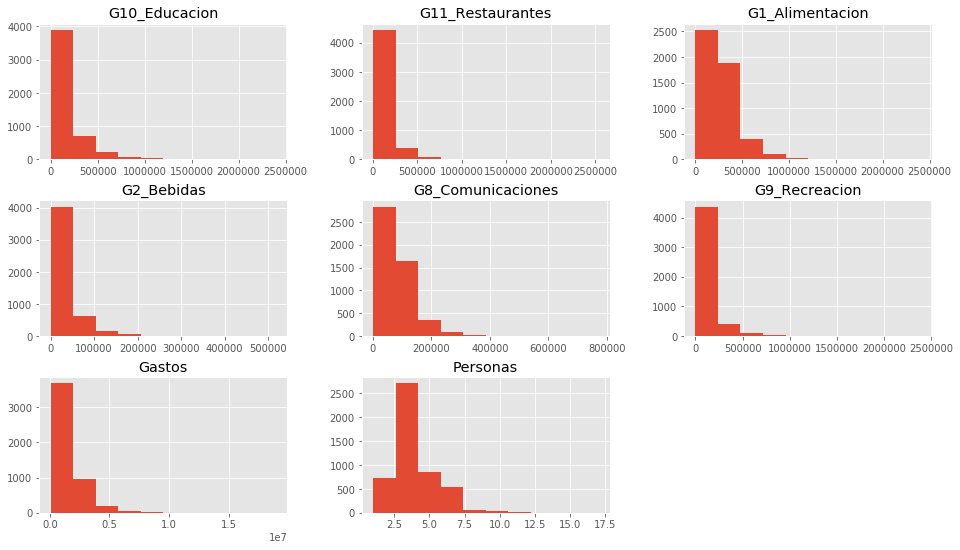

In [53]:
df_t02.drop(['Categoria'], axis=1).hist()
plt.show()

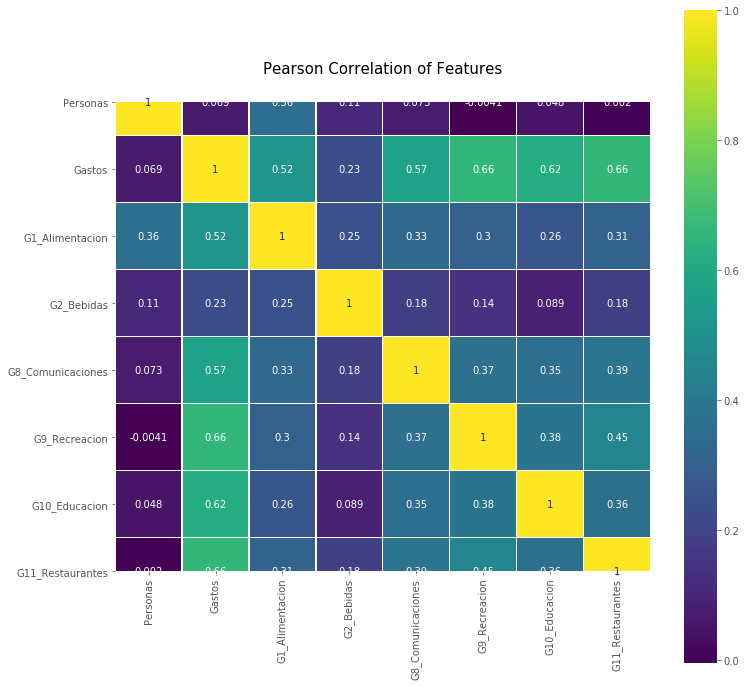

In [54]:
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df_t02.drop('Categoria', axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

---
### Gráfico de matriz

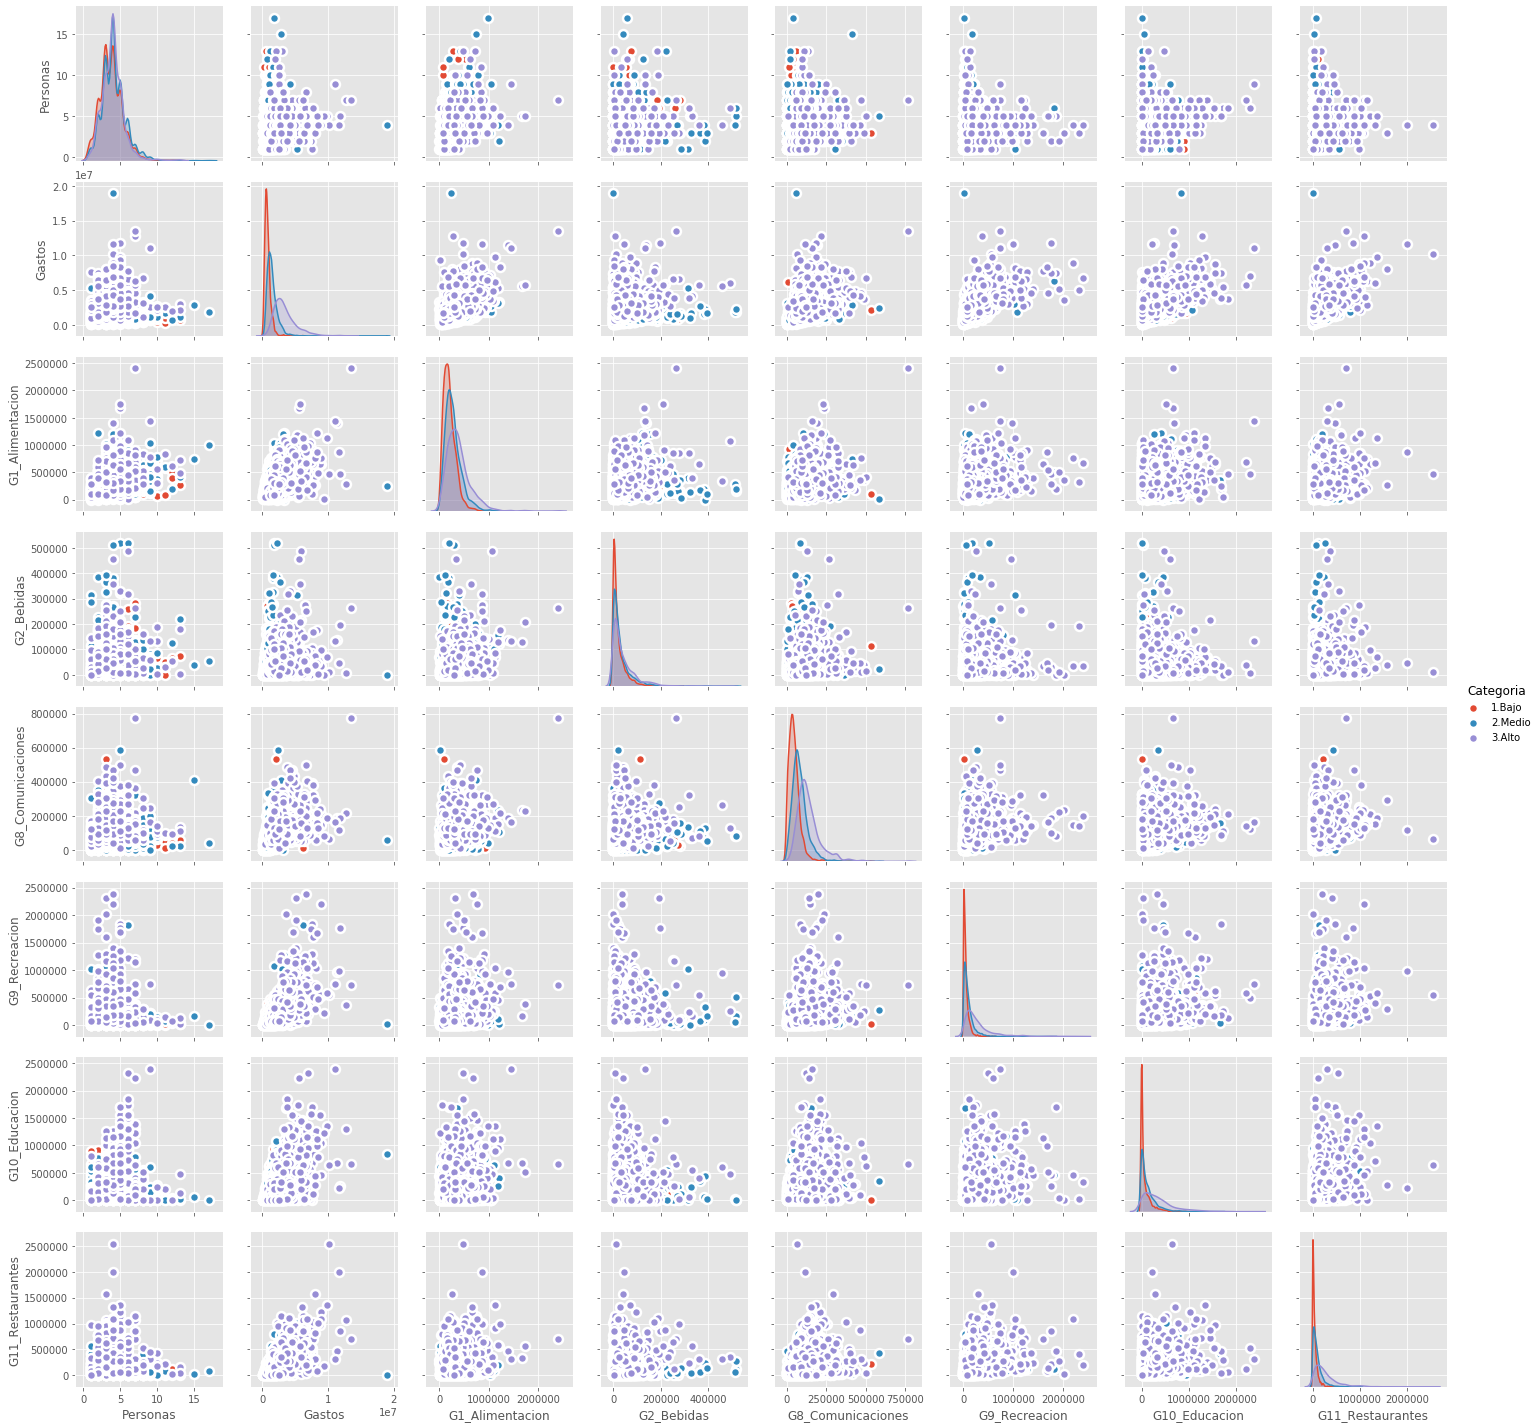

In [55]:
import seaborn as sns
sns.pairplot(df_t02, kind="scatter", hue="Categoria", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [56]:
# seleccionamos datos

#variable objetivo
y=df_t02.Categoria.astype('category')
#predictores
x=df_t02.drop('Categoria', axis=1)
#mostramos resultados
print(y)
print(x)
print(x.columns)

0        1.Bajo
1       2.Medio
2        1.Bajo
3        1.Bajo
4        1.Bajo
         ...   
4936    2.Medio
4937     3.Alto
4938    2.Medio
4939    2.Medio
4940    2.Medio
Name: Categoria, Length: 4941, dtype: category
Categories (3, object): [1.Bajo, 2.Medio, 3.Alto]
      Personas   Gastos  G1_Alimentacion     G2_Bebidas  G8_Comunicaciones  \
0            5  1387893    281100.250000   42993.125000       75693.396226   
1            4  1880938    255973.527878  137113.429554      110929.322637   
2            5  1399475    202343.931967     307.170378      145270.167519   
3            2   340514    113543.777348     663.321978       40113.968095   
4            1  1129143     15000.000000   14100.000000       75000.000000   
...        ...      ...              ...            ...                ...   
4936         3   714181    102140.634752     114.873039       43000.000000   
4937         1  2500367    290921.496978     426.612644      121544.056491   
4938         4  1745171  

In [57]:
# CPARTICION DE LOS DATOS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)

(3458, 8)
(1483, 8)


In [58]:
#defnimos el modelo de arboles de decision
arbol = DecisionTreeClassifier()
#ajustamos el modelo a los datos de entrenamiento
arbol.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
#creamos el objeto dot
#dot_data = tree.export_graphviz(arbol,out_file="C:/Users/Fele/Desktop/UDD/ejemplos/Clase 5/arbol.dot",
dot_data = tree.export_graphviz(arbol,out_file="arbol.dot",
                                feature_names=x_train.columns, impurity=False, class_names=True)
#la libreria de exportacion a png aun se encuentra inestable, por lo que ingresremos el contenido del archivo generado
#en la siguiente plataforma de visualizacion de graphviz
#https://dreampuf.github.io/GraphvizOnline/

In [60]:
#se implementa el modelo sobre los datos de validacion
y_pred = arbol.predict(x_test)

In [61]:
#obtenemos las metricas de rendimiento, donde se observa un serio desbalance entre las clases
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[295 175   6]
 [186 451  83]
 [ 23  99 165]]
              precision    recall  f1-score   support

      1.Bajo       0.59      0.62      0.60       476
     2.Medio       0.62      0.63      0.62       720
      3.Alto       0.65      0.57      0.61       287

    accuracy                           0.61      1483
   macro avg       0.62      0.61      0.61      1483
weighted avg       0.62      0.61      0.61      1483



In [62]:
#modelo de arbol de decision con proceso de poda de ramas entrópicas (¿Qué es la entropía]?)
# es una métrica que permite medir el nivel de incertidumbre o "desorden"
#el criterio de entropia permite decidir el orden de las características a introducir en las particiones
#de manera tal que un atributo de particion pura ayuda a reducir la entropia
#entropia(s)=sum(-p_i*log2*p_i)
#s es una colección de objetos
#p_i es la proboabilidad para un determinado valor en una caracteristica

#por otro lado max_depth permite asignar un nivel de profundidad fijo para el arbol, es decir, el númerom de ramas entre 
#el nodo raíz y los nodos hojas, que en este caso es 3
arbol2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [63]:
#ajustamos el modelo a los datos de entrenamiento
arbol2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
#creamos objeto dot para su visualizacion
#dot_data = tree.export_graphviz(arbol2,out_file="C:/Users/Fele/Desktop/UDD/ejemplos/Clase 5/arbol2.dot",
dot_data = tree.export_graphviz(arbol2,out_file="arbol2.dot",
                                feature_names=x_train.columns, impurity=False, class_names=True)

In [65]:
#ajustamos el modelo a los datos de validacion
y_pred = arbol2.predict(x_test)

In [66]:
#obtenemos las metricas de desempeño
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[368 106   2]
 [222 458  40]
 [  4 137 146]]
              precision    recall  f1-score   support

      1.Bajo       0.62      0.77      0.69       476
     2.Medio       0.65      0.64      0.64       720
      3.Alto       0.78      0.51      0.61       287

    accuracy                           0.66      1483
   macro avg       0.68      0.64      0.65      1483
weighted avg       0.67      0.66      0.65      1483



In [67]:
#CLASIFICADOR RANNDOM FOREST
#EMSEMBLE METHODS, BAGGING, Arboles, Bosque, Arbol promedio
#rf = RandomForestClassifier(n_estimators=10000, criterion = 'gini', random_state=1)
rf = RandomForestClassifier(n_estimators=1000, criterion = 'gini', random_state=1)
#ojo que aca cambiamos el criterio de de reduccion de cumplejidad, se trata del indice de gini, el cual permite observar
# el complemento de la suma cuadrática de las probabilidades
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [68]:
#ajustamos el modelo a los datos de validación
y_pred = rf.predict(x_test)

In [69]:
#obtenemos las matricas de desempeño, donde observamos COMPLETAR en realación al arbol podado
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      1.Bajo       0.69      0.70      0.69       470
     2.Medio       0.74      0.66      0.70       809
      3.Alto       0.54      0.76      0.64       204

    accuracy                           0.69      1483
   macro avg       0.66      0.71      0.68      1483
weighted avg       0.70      0.69      0.69      1483



In [70]:
#listado de caracteristicas segun su importancia dentro del modelo
etiquetas=list(x.columns)
for feature in zip(etiquetas, rf.feature_importances_):
    print(feature)

('Personas', 0.04460533916304234)
('Gastos', 0.2524785756950693)
('G1_Alimentacion', 0.09933864047178297)
('G2_Bebidas', 0.08653785666298558)
('G8_Comunicaciones', 0.15024915257625954)
('G9_Recreacion', 0.12400704857324382)
('G10_Educacion', 0.11007558520916519)
('G11_Restaurantes', 0.1327078016484513)


In [71]:
#Dado quye el listado es practicamente ilegible, seleccionamos solo aquellos atributos que cumplan con determinado
#nivel de importancia (aquellas cuyo peso relativo están por sobre el promedio) y volvemos a ajustar el modelo sobre esta seleccion
selec= SelectFromModel(RandomForestClassifier(n_estimators = 1000))


#selec= SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=0.5) JUGAR con esto¡¡¡
# Train the selector
selec.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
 

In [72]:
#imprimimos el nombre de los atributos seleccionados
for feature_list_index in selec.get_support(indices=True):
    print(etiquetas[feature_list_index])
    

Gastos
G8_Comunicaciones
G11_Restaurantes


In [73]:
# con esto podemos entrenar un nuevo modelo con las caracteristica selecciones
#tranformamos las particiones de los predictores, majustadas a la seleccion
x_selec_train = selec.transform(x_train)
x_selec_test = selec.transform(x_test)

In [74]:
# entrenamos un modelo en base a esta seleccion
#rf_selec = RandomForestClassifier(n_estimators=10000, random_state=1)
rf_selec = RandomForestClassifier(n_estimators=1000, random_state=1)

# Train the new classifier on the new dataset containing the most important features
rf_selec.fit(x_selec_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [75]:
#obtenemos las metricas de desempeño para el modelo basado en la seleccion
y_selec_pred = rf_selec.predict(x_selec_test)
print(confusion_matrix(y_test,y_selec_pred))
print(classification_report(y_test,y_selec_pred))

#la selección de artibutos permitio aumentar el rendimiento del clasificador, ya que permite reducir el ruido
#Tarea, pruebe un modelo con criterios de seleccion mas exigentes (argumento threshold)

[[313 161   2]
 [131 534  55]
 [  2 127 158]]
              precision    recall  f1-score   support

      1.Bajo       0.70      0.66      0.68       476
     2.Medio       0.65      0.74      0.69       720
      3.Alto       0.73      0.55      0.63       287

    accuracy                           0.68      1483
   macro avg       0.70      0.65      0.67      1483
weighted avg       0.68      0.68      0.68      1483



### Comparación.

Se comparan los resultados obtenidos por las modelos entrenados

<img src="ComparaResultados.png">

# Conclusiones

ESCRIBIR CONCLUSIONES
